# Time Series Analysis

This project aims to analyse time series from a Wi-Fi sensor located in the town of Otley, West Yorkshire. For the purpose of this project data from one sensor has been utilised. The project utilises a number of techniques, including: 

- Visualising time series data


- Calculating the moving average based on a 30 day period


- First order differencing


- Anomaly detection


- ARIMA modelling


- Stepwise modelling


The purpose of the project is to utilise techniques which provide an insight into the temporal fluctuations within the dataset. 


The Wi-Fi sensor data represents footfall and is for the year 2016, covering 1st Janauary - 31st December. The data was originally at an hourly level but was aggregated to a daily level.

Please note that the data must be in date order before proceeding 

- Importing the packages

In [99]:
# Import packages
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf 

%matplotlib inline
sns.set()

from pandas import Series
from itertools import product                  
from tqdm import tqdm_notebook
from scipy.optimize import minimize   
from sklearn.metrics import r2_score
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from dateutil.relativedelta import relativedelta 
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMAResults

# Import the dataset with .read_csv() and check the first 5 rows with .head()

- We can see that there are 2 columns of data: date and count
 

- Date is the timestamp from the day, month and year the data was collected and count is the footfall recorded by all the cameras combined on each day

In [100]:
# reading in the data which is saved as a CSV file and giving it the name 'df'
df = pd.read_csv('FootfallData.csv')

# printing the first 5 rows of the dataframe 
df.head()

,Date,Count
0,2016-01-01,225
1,2016-01-02,513
2,2016-01-03,13
3,2016-01-04,216
4,2016-01-05,385


## Using the .info() method to check the data types, number of rows, etc

In [101]:
# retrieving information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
Date     366 non-null object
Count    366 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


# Wrangling the data

- The columns of the dataframe are renamed so that they have no whitespaces

- To do this a list of what the columns are called is reassigned to df.columns

In [102]:
# the names of the column headings are specified as 'date' and 'count'
df.columns = ['date', 'count']

"""
the first 5 rows are printed in order to check the headings 
are displayed correctly
"""
df.head()

,date,count
0,2016-01-01,225
1,2016-01-02,513
2,2016-01-03,13
3,2016-01-04,216
4,2016-01-05,385


- The date column is turned into a DateTime data type and is made the index of the dataframe

In [103]:
# the 'date' column of the dataframe is converted into a datetime data type
df.date = pd.to_datetime(df.date)

# the date is set as the index of the dataframe 
df.set_index('date', inplace=True)

In [104]:
# printing the first 5 values of the dataframe 
df.head()

,count
date,
2016-01-01,225
2016-01-02,513
2016-01-03,13
2016-01-04,216
2016-01-05,385


# Exploratory Data Analysis (EDA)

- Plotting the data as a time series

- Arguments can be specified such as figsize, linewidth and fontsize

- A label can be applied to the x-axis and the font size of the label can be specified 

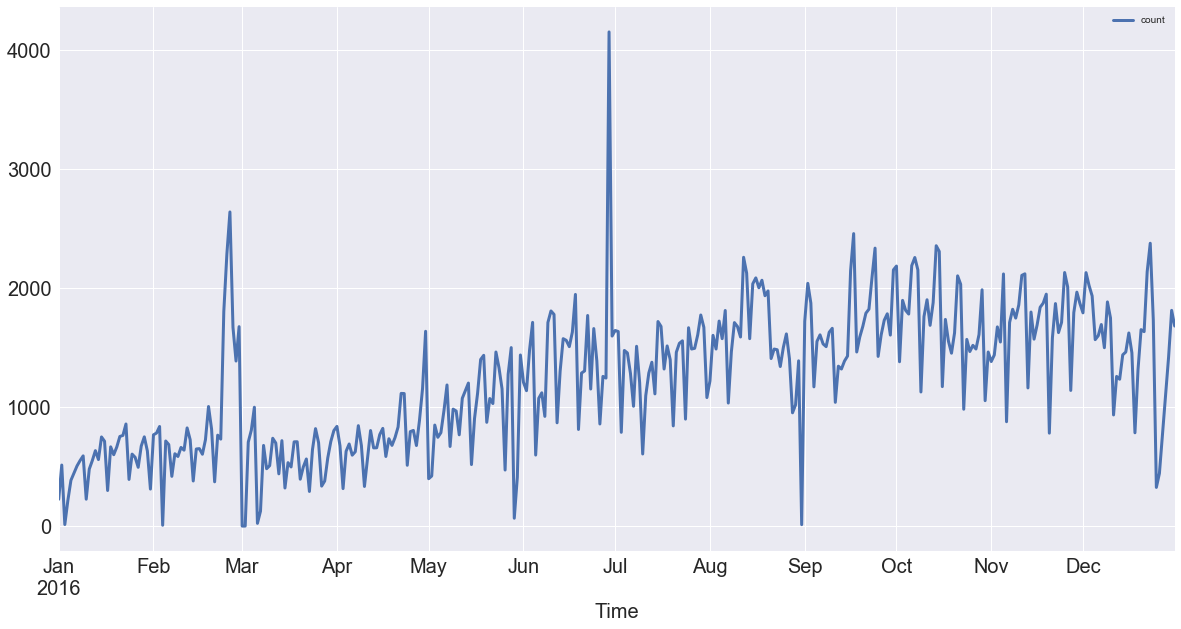

In [105]:
"""
plotting the data frame, specifying the size of the figure,
line width and font size
"""
df.plot(figsize=(20,10), linewidth=3, fontsize=20)

""""
adding a label to the x-axis of the plot with the name 'Time' and specifying 
that it uses font size 20
"""
plt.xlabel('Time', fontsize=20);

- Above is a plot of the data in which we can see the fluctuations in footfall across the period of the year. Generally, monthly fluctuations can be identified as at the end of one month/the beginning of another there is a drop in footfall. The exception is for the month of February in which there appears to be two significant peaks, one towards towards the second week fo the month, and another which occurs near the end of the month. From this plot there is one extreme value which can be identified, which takes places on the 29th June. This coincides with a popular annual cycle race in Otley town centres and attracts a large number of visitors. It is challenging to establish any pattern which occurs across the course of the year from this plot. 

# Trends and Seasonality in Time Series Data

- Identifying trends in time series data


- There are several ways to identify trends in time series data


- One way is to take the rolling average 


- This means that for each time point you take the average of the points either side of it 


- The number of points is specified by a window size which needs to be selected


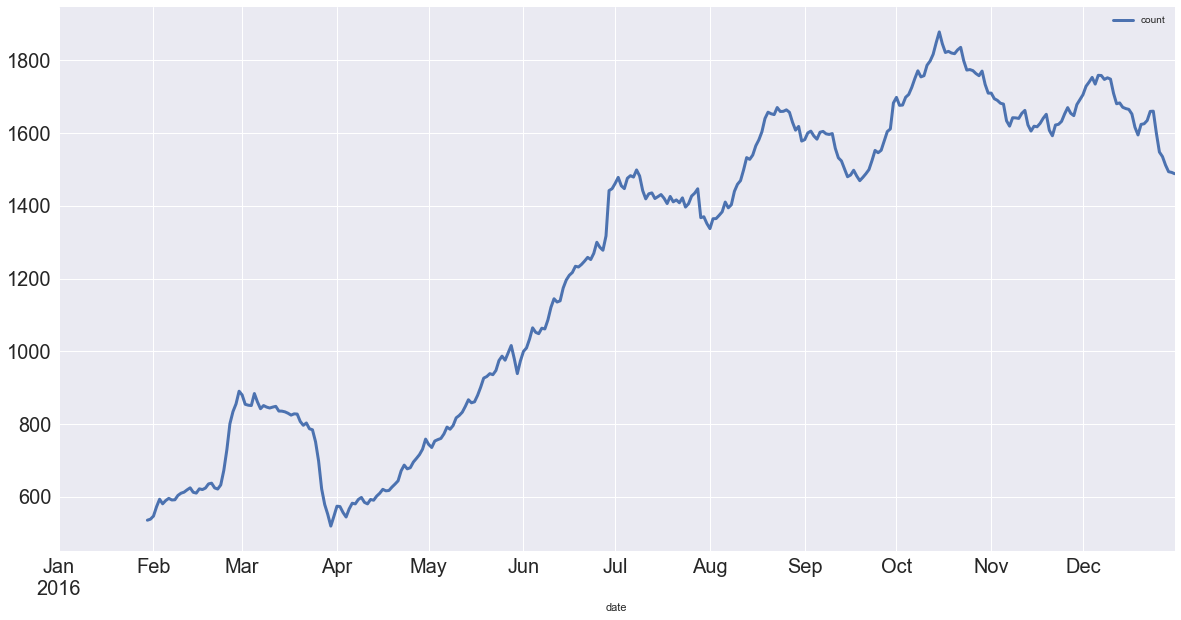

In [106]:
"""
specifying the column of the dataframe from which we 
want to calculate the rolling average
"""

count = df[['count']]

"""
here we calulate the rolling mean with a window length of 30
this means that a monthly rolling mean is created 
the size of the figure is then specified
"""
rolling_periods = [30]
for p in rolling_periods:
    count.rolling(window=p).mean().plot(figsize=(20,10), linewidth=3, fontsize=20)
    plt.show()


Here we can see that there is a distinct trend in the data with increases occuring from April onwards until a peak is reached in mid-October. Figures start to fall once again after the first week in December. There is a significant increase which occurs during the final week of February and remains at over 800 counts until the last week of March in which there is a rapid decrease. Rolling averages can be extremely useful as they smooth out trends which appear in the plot of the time series data. General trends over the period of 2016 can be identified and the findings can be utilised by both the private and the public sector.

# Seasonal Patterns in Time Series Data

Seasonal components of time series data can be analysed by removing the trend from a time series so that seasonsality can be investigated more easily.


One way to remove the trend is called differencing, where you look at the difference between successive date points. This is called first order differencing. This method is demonstrated below:

#### First order differencing

The diff() and plot() methods are utilised to compute and plot the first order difference of the counts

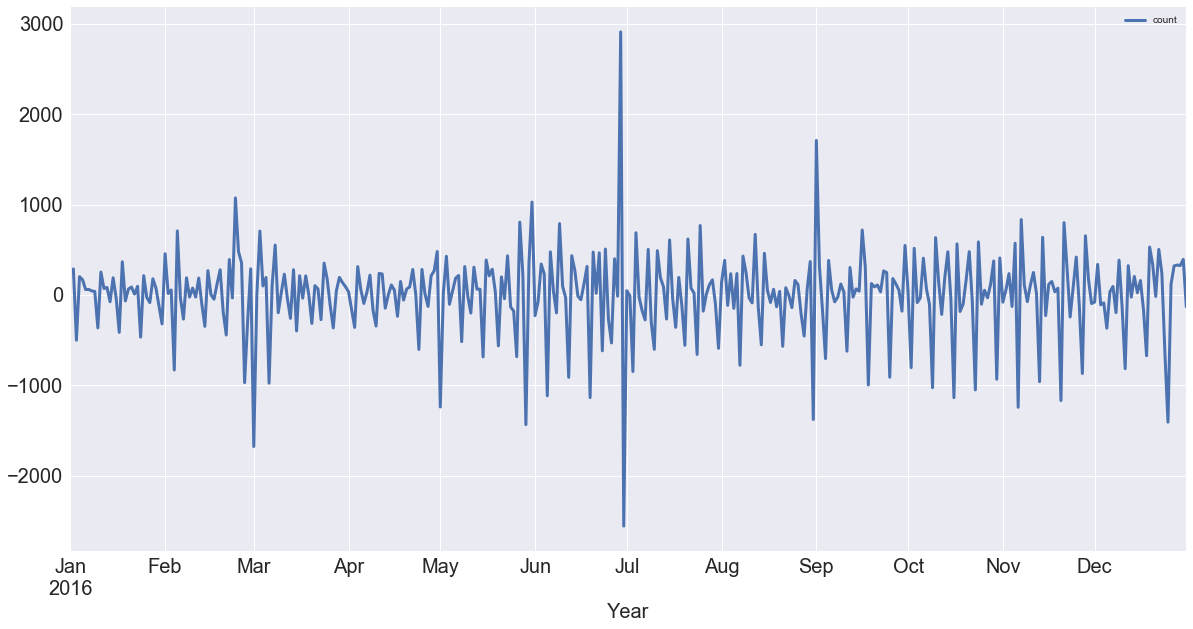

In [107]:
"""
here we are calculating the difference between two counts for different time points 
then plotting the values of those differences
a value of 0 would mean that there was no difference between a count
and the count for the previous day
"""
count.diff().plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20);

- This method measures the difference between counts at each time point, for example, the difference between the count on the 1st of January and the 2nd of January. Negative values occur when there is a decrease between time points. Positive values occur when there is an increase in counts in between data points.


- First order differencing is useful for turning the time series into a stationary time series 


- Stationary time series are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary

- First order differencing is useful for turning the time series into a stationary time series 

- Stationary time series are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary


Below the first difference ordering values are printed:

In [108]:
"""
printing the values of count.diff 
(the difference between the data for two time points)
"""
x = count.diff()

# making a dataframe called 'stationary' with the data 'x'
stationary = pd.DataFrame(data = x)

# showing the dataframe 'stationary'
stationary

,count
date,
2016-01-01,NaN
2016-01-02,288.0
2016-01-03,-500.0
2016-01-04,203.0
2016-01-05,169.0
2016-01-06,60.0
2016-01-07,61.0
2016-01-08,45.0
2016-01-09,39.0


First order differencing is a useful tool for a number of reasons. Firstly, it makes the data stationary which can be useful for a range of time series analysis techniques. Additionally, we are able to see the changes between days which can aid the detection of trends, especially if we want to investigate specific events.

# Anomaly detection 

- Anomaly detection detects data points within a dataset that do not fit well with the rest of the data


- Below a simple anomaly detection system is created using the moving average

In [109]:
# creating a function
def plotMovingAverage(series, window, plot_intervals=True, 
                      scale=1.96, plot_anomalies=True):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    # specifying the moving average also referred to as the rolling mean
    rolling_mean = series.rolling(window=window).mean()
    # plotting the figure
    plt.figure(figsize=(15,5))
    # plotting the figure title 
    plt.title("Moving average\n window size = {}".format(window))
    # plotting the rolling mean
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values (the moving average)
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
    
    # plotting the labels, legend and the grid markings    
    plt.plot(series[window:], label="Counts")
    plt.legend(loc="upper left")
    plt.grid(True)

In [110]:
# this dectects if we have a 50% change in footfall values
count.iloc[-50] = count.iloc[-50] * 0.5 

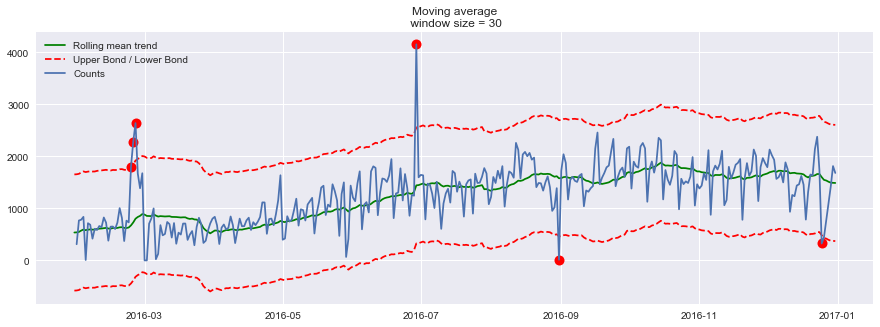

In [111]:
"""
plotting the moving average specifying a window size of 30
a window size of 30 was chosen to reflect the monthly patterns which
occur within the dataset
the number '30' represents the number of days within the month
""" 
plotMovingAverage(count, 30)

- 6 anomalies were identified

-  The model did not just capture changes between months due to seasonality, therefore it is likely that there may be underlying reasosns for these anomalies.

- The 29th of June is highlighted as a significant peak, this coincides with the annual cycling race which takes place in Otley town centre.

- There are some dates with very low counts and some of 0, which suggests issues with the Wi-Fi sensors on these dates

# ARIMA modelling

ARIMA models are a class of statistical models for analyzing and forecasting time series data

It caters to standard structures in time series data and provides a simple yet powerful method for making skillful time series forecasts

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.


- I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.


- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

There are 3 distinct untegers utsed as parameters within ARIMA models: p, d and q. These paramaters account for seasonality, trend and noise within datasets. 

- p: auto-regressive element

- d: integrated part of the model

- q: moving average element

In [112]:
# wrapper around run time error of ARIMA class 
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__
 
# load data
series = Series.from_csv('FootfallData.csv', header=0)

# prepare data
X = series.values
X = X.astype('float32')

"""
fit model
the three values following order represent P, D and Q 
which are the model parameters
the model parameters can be tweaked to change the results
"""
model = ARIMA(X, order=(2,1,3))
model_fit = model.fit()

# save the model
model_fit.save('model.pkl')

# load the model
loaded = ARIMAResults.load('model.pkl')

- Below the results of the ARIMA model are printed

- It summarises coefficient values, z score and p- values

In [113]:
# printing a stastical summary of the fit of the ARIMA model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  365
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2690.798
Method:                       css-mle   S.D. of innovations            384.095
Date:                Mon, 01 Apr 2019   AIC                           5395.597
Time:                        13:17:25   BIC                           5422.896
Sample:                             1   HQIC                          5406.446
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8226      3.074      0.918      0.359      -3.202       8.847
ar.L1.D.y     -0.6009      0.089     -6.750      0.000      -0.775      -0.426
ar.L2.D.y     -0.7697      0.069    -11.180      0.0

The model summary provides a lot of information regarding the ARIMA model. The table in the middle is the coefficients table where the values listes under the heading coef are the weights of each term. 

The coefficient column highlights the weight (importance) of each feature and how each value impacts upon the time series. The coefficient value for the moving average was nearly-1, thus significant.

The P> column shows the P values. The P values tell us the significance of each feature weight. The MA (moving average)and AR (autoregression) have a P value which is less than 0.05 therefore they should be kept in the model


### Plotting the residual errors

The residual errors can be plotted to ensure that there aren't any patterns

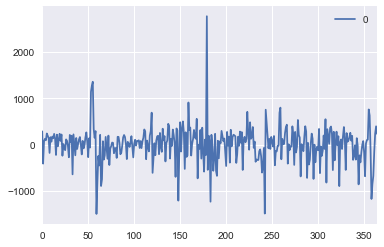

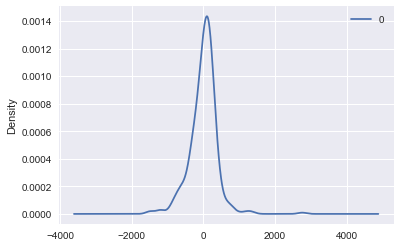

                 0
count   365.000000
mean      1.635599
std     384.964040
min   -1489.888155
25%    -168.171726
50%      45.239818
75%     191.652058
max    2762.040643


In [114]:
# plot residual errors and the kernel density estimation of the residuals
residuals = pd.DataFrame(model_fit.resid)

# plot the residuals
residuals.plot()

# plot the kernel density estimates
residuals.plot(kind='kde')

# show the plots
plt.show()

# print summary statistics for the residuals
print(residuals.describe())

- The mean of the residuals is close to 0 but as it is not 0 there is still room for improvement in the model

- The results are distributed normally 

## The same process is now repeated utilising different P, D and Q paramters 

In [115]:
# load data
series = Series.from_csv('FootfallData.csv', header=0)

# prepare data
X = series.values
X = X.astype('float32')

"""
fit model
the three values following order represent P, D and Q 
which are the model parameters
the model parameters can be tweaked to change the results
"""
model = ARIMA(X, order=(2,1,4))
model_fit = model.fit()

# save the model
model_fit.save('model.pkl')

# load the model
loaded = ARIMAResults.load('model.pkl')

In [116]:
# printing a stastical summary of the fit of the ARIMA model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  365
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -2672.271
Method:                       css-mle   S.D. of innovations            361.923
Date:                Mon, 01 Apr 2019   AIC                           5360.542
Time:                        13:17:26   BIC                           5391.741
Sample:                             1   HQIC                          5372.941
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8402      2.693      1.055      0.292      -2.437       8.117
ar.L1.D.y     -0.4435      0.003   -147.145      0.000      -0.449      -0.438
ar.L2.D.y     -0.9996      0.001  -1231.664      0.0

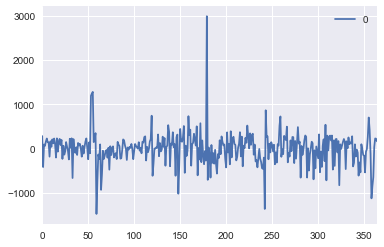

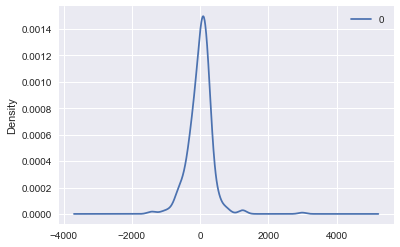

                 0
count   365.000000
mean      1.945539
std     365.361601
min   -1469.718118
25%    -175.404759
50%      35.453832
75%     181.627215
max    2988.507205


In [117]:
# plot residual errors and the kernel density estimation of the residuals
residuals = pd.DataFrame(model_fit.resid)

# plot the residuals
residuals.plot()

# plot the kernel density estimates
residuals.plot(kind='kde')

# show the plots
plt.show()

# print summary statistics for the residuals
print(residuals.describe())

The new parameters produce a model with a lower AIC and more of the variables have a significant P-value
The mean of the residuals is slightly higher 

# Creating a stepwise model

Stepwise models are a method of fitting regression model

The choice of the predictive variables is carried out by an automatic procedure


In [126]:
# here we are setting up the parameters of the stepwise model 
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           # m=7 relates to weekly fluctuations
                           max_p=7, max_q=4, m=7,
                           start_P=0, seasonal=True,
                           trace=True,
                           # don't show warnings
                           suppress_warnings=True, 
                           stepwise=True) # only uses stepwise models
"""
print the AIC values of the stepwise model
the lower the value of the AIC, the better the model
the AIC of the model with the lowest AIC is printed after the fit name
the AIC takes into account the goodness of fit and the simplicity of the model
""" 
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=5361.018, BIC=5380.517, Fit time=0.532 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=5531.913, BIC=5539.713, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=5409.535, BIC=5425.135, Fit time=0.174 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=5394.882, BIC=5410.482, Fit time=0.339 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=5296.106, BIC=5319.506, Fit time=0.828 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=5332.970, BIC=5352.470, Fit time=0.397 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=5293.154, BIC=5320.454, Fit time=1.145 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=5291.163, BIC=5314.562, Fit time=0.864 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 2, 7); AIC=5369.116, BIC=5388.616, Fit time=0.700 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_o

In [127]:
# specifying the data which will be included in the train set
train = df.loc['2016-01-01':'2016-10-31']

# specifying the data which will be included in the test set
test = df.loc['2016-11-01':'2016-12-31']

In [128]:
# fit the stepwise model using the train dataframe
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 0, 1, 7), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [129]:
# print the length of the test dataset
len(test)

61

In [130]:
# name a variable called future forecast and assign it to the 61 predicted values
future_forecast = stepwise_model.predict(n_periods=61)

In [131]:
# print the dataframe future forecast
print(future_forecast)

[1715.55386842 1815.07297424 1914.00241507 2163.21310998 2185.89203447
 1481.82978535 1832.60579563 1892.9096683  1888.12623388 1949.38147744
 2198.30173112 2220.97225029 1517.80640096 1868.16551946 1928.4141431
 1923.65649447 1984.85530452 2233.48547857 2256.14760288 1553.87703731
 1903.81978308 1964.01322648 1959.28133151 2020.42377833 2268.76423391
 2291.4179738  1590.04157736 1939.56846877 1999.70680064 1995.00062728
 2056.08678104 2304.13787884 2326.78324477 1626.29990419 1975.411459
 2035.49474793 2030.81426417 2091.84419494 2339.60629523 2362.24329761
 1662.65190102 2011.34863633 2071.37695087 2066.72212471 2127.6959025
 2375.16936508 2397.79801433 1699.09745125 2047.37988351 2107.3532921
 2102.7240916  2163.64178632 2410.82697055 2433.44727707 1735.6364384
 2083.50508343 2143.42365443 2138.82004767 2199.68172915 2446.57899395
 2469.19096812]


In [132]:
"""
name a variable called future_forecast and create a dataframe 
which has a column called prediction
"""
future_forecast = pd.DataFrame(future_forecast,index 
                               = test.index,columns=['Prediction'])

# link the test data frame with the future_forecast dataframe
output_data = pd.concat([test,future_forecast],axis=1)

# print the dataframe 'output_data'
print(output_data)

            count   Prediction
date                          
2016-11-01   1383  1715.553868
2016-11-02   1438  1815.072974
2016-11-03   1674  1914.002415
2016-11-04   1547  2163.213110
2016-11-05   2119  2185.892034
2016-11-06    877  1481.829785
2016-11-07   1711  1832.605796
2016-11-08   1822  1892.909668
2016-11-09   1748  1888.126234
2016-11-10   1858  1949.381477
2016-11-11   2107  2198.301731
2016-11-12   2120  2220.972250
2016-11-13   1161  1517.806401
2016-11-14   1799  1868.165519
2016-11-15   1571  1928.414143
2016-11-16   1690  1923.656494
2016-11-17   1839  1984.855305
2016-11-18   1874  2233.485479
2016-11-19   1949  2256.147603
2016-11-20    781  1553.877037
2016-11-21   1581  1903.819783
2016-11-22   1870  1964.013226
2016-11-23   1626  1959.281332
2016-11-24   1712  2020.423778
2016-11-25   2131  2268.764234
2016-11-26   2009  2291.417974
2016-11-27   1140  1590.041577
2016-11-28   1794  1939.568469
2016-11-29   1966  1999.706801
2016-11-30   1871  1995.000627
...     

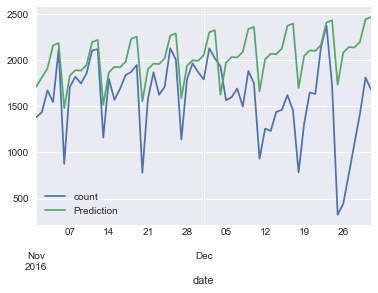

In [133]:
# plot the figure
plt.figure()

# plot the output_data
output_data.plot()

# show the plot
plt.show()

Here we can see that for the month of November the timestep model is able to predict the counts relatively successfully. The temporal spacing of the flucutations in the counts are also predicted for December, however the model clearly does not capture realistic counts. Given the dataset which has been read in, we would not expect figures for December to be accuractely predicted. The impact of Christmas is significant on the counts of footfall, with the number of counts significantly less than in other months.